<a href="https://colab.research.google.com/github/benjacd/t2_mineria/blob/main/TallerMineria2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importando el DataSet
pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Taller 2/houses_to_rent_v2.csv', sep = ",")

In [ ]:
df.info()
#Variables importantes
#Variables independientes = city, area, rooms, bathroom, parking spaces, floor, animal, furniture
#Variables dependientes = hoa, rent amount, property tax, fire insurence, total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
df.groupby(['floor']).count()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
floor,,,,,,,,,,,,
-,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461
1,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081,1081
10,357,357,357,357,357,357,357,357,357,357,357,357
11,303,303,303,303,303,303,303,303,303,303,303,303
12,257,257,257,257,257,257,257,257,257,257,257,257
13,200,200,200,200,200,200,200,200,200,200,200,200
14,170,170,170,170,170,170,170,170,170,170,170,170
15,147,147,147,147,147,147,147,147,147,147,147,147
16,109,109,109,109,109,109,109,109,109,109,109,109


(array([1.0691e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.,  31370.,  62740.,  94110., 125480., 156850., 188220.,
        219590., 250960., 282330., 313700.]),
 <a list of 10 Patch objects>)

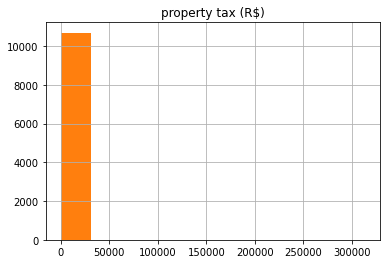

In [ ]:
df.hist('property tax (R$)')
plt.hist(df["property tax (R$)"])

In [ ]:
# Reemplazo de datos - por 0 de la columna floor
# cambiamos el tipo de dato de objeto a entero
#Se determina que los valores superiores al edificio mas alto del mundo se eliminan
df2 = df
df2['floor'] = df2['floor'].replace(['-'], '0')
df2['floor'] = df2['floor'].astype(int)


In [ ]:
#Eliminar datos outliers

#Se determina que los valores superiores al edificio mas alto del mundo se eliminan
df2.drop(df2.index[df2['floor'] > 186], inplace = True)
# Se eliminan los valores superiores a 745 (calculado bajo la regla de 1.5) de la columna property tax (R$)
df2.drop(df2.index[df2['property tax (R$)'] > 745], inplace = True)
#Deteccion outlier en fire insurance por lo tanto bajo la regla del 1.5 se eliminaran
df2.drop(df2.index[df2['fire insurance (R$)'] > 134], inplace = True)
#Deteccion outlier en area, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['area'] > 300], inplace = True)
#Deteccion outlier en bathroom, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['bathroom'] > 6], inplace = True)
#Deteccion outlier en rooms, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['rooms'] > 6], inplace = True)
#Deteccion outlier en ROA, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['hoa (R$)'] > 2075], inplace = True)
#Deteccion outlier en total, se eliminan los valores bajo la regla del 1.5
df2.drop(df2.index[df2['total (R$)'] > 6000], inplace = True)
#Deteccion outlier en parking spaces

In [ ]:
df2.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,7181.000000,7181.000000,7181.000000,7181.000000,7181.000000,7181.000000,7181.000000,7181.000000,7181.000000,7181.000000
mean,79.682356,2.049575,1.573458,0.970756,4.766049,526.307339,2100.506197,106.901128,28.575129,2762.469015
std,46.250852,0.904211,0.785887,0.980297,4.923778,438.244503,1036.343283,118.621148,14.612234,1309.288008
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,48.000000,1.000000,1.000000,0.000000,1.000000,200.000000,1250.000000,18.000000,17.000000,1703.000000
50%,69.000000,2.000000,1.000000,1.000000,3.000000,460.000000,1900.000000,71.000000,25.000000,2532.000000
75%,100.000000,3.000000,2.000000,1.000000,7.000000,754.000000,2800.000000,150.000000,37.000000,3685.000000
max,250.000000,6.000000,6.000000,10.000000,51.000000,2065.000000,5900.000000,741.000000,91.000000,6000.000000


(array([3.040e+03, 1.723e+03, 7.090e+02, 7.750e+02, 3.660e+02, 2.850e+02,
        1.100e+02, 8.200e+01, 2.500e+01, 4.500e+01, 1.900e+01, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.  ,  2.55,  5.1 ,  7.65, 10.2 , 12.75, 15.3 , 17.85, 20.4 ,
        22.95, 25.5 , 28.05, 30.6 , 33.15, 35.7 , 38.25, 40.8 , 43.35,
        45.9 , 48.45, 51.  ]),
 <a list of 20 Patch objects>)

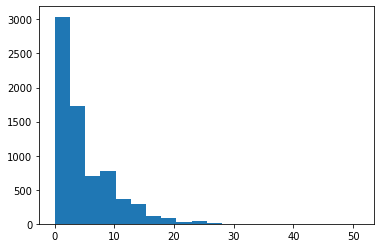

In [ ]:
plt.hist(df2["floor"], bins=20)


(array([2397., 1250., 1048.,  632.,  455.,  342.,  311.,  184.,  149.,
         111.,   83.,   61.,   33.,   45.,   19.,   13.,   15.,   10.,
          11.,   12.]),
 array([  0.  ,  37.05,  74.1 , 111.15, 148.2 , 185.25, 222.3 , 259.35,
        296.4 , 333.45, 370.5 , 407.55, 444.6 , 481.65, 518.7 , 555.75,
        592.8 , 629.85, 666.9 , 703.95, 741.  ]),
 <a list of 20 Patch objects>)

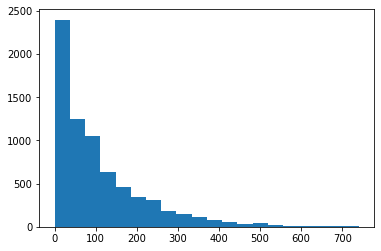

In [ ]:
plt.hist(df2["property tax (R$)"], bins=20,)

(array([2296.,    0.,    0.,    0., 2634.,    0.,    0.,    0., 1906.,
           0.,    0.,    0.,  302.,    0.,    0.,    0.,   30.,    0.,
           0.,   13.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <a list of 20 Patch objects>)

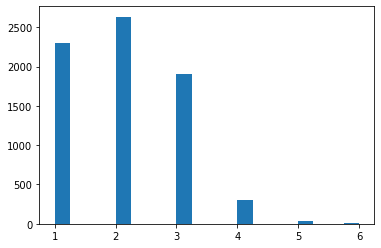

In [ ]:
plt.hist(df2["rooms"], bins=20,)

(array([4.130e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.219e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 6.330e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        1.640e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.400e+01, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ]),
 <a list of 20 Patch objects>)

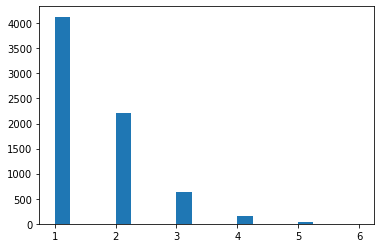

In [ ]:
plt.hist(df2["bathroom"], bins=20,)

(array([1838., 1421., 1427.,  989.,  593.,  348.,  239.,  173.,   97.,
          56.]),
 array([   0. ,  206.5,  413. ,  619.5,  826. , 1032.5, 1239. , 1445.5,
        1652. , 1858.5, 2065. ]),
 <a list of 10 Patch objects>)

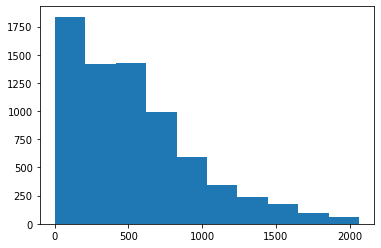

In [ ]:
plt.hist(df2["hoa (R$)"], bins=10,)

(array([ 402., 1168., 1281., 1100.,  864.,  706.,  591.,  459.,  373.,
         237.]),
 array([ 499. , 1049.1, 1599.2, 2149.3, 2699.4, 3249.5, 3799.6, 4349.7,
        4899.8, 5449.9, 6000. ]),
 <a list of 10 Patch objects>)

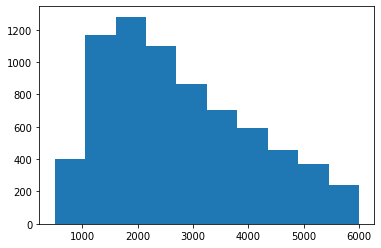

In [ ]:
plt.hist(df2["total (R$)"], bins=10,)

(array([1838., 1421., 1427.,  989.,  593.,  348.,  239.,  173.,   97.,
          56.]),
 array([   0. ,  206.5,  413. ,  619.5,  826. , 1032.5, 1239. , 1445.5,
        1652. , 1858.5, 2065. ]),
 <a list of 10 Patch objects>)

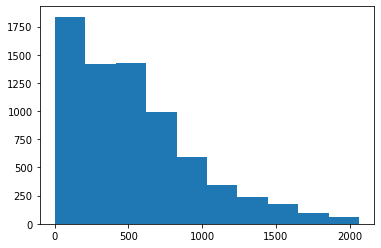

In [ ]:
plt.hist(df2["hoa (R$)"], bins=10,)

(array([2.444e+03, 3.137e+03, 1.213e+03, 2.400e+02, 1.030e+02, 3.800e+01,
        2.200e+01, 3.000e+00, 1.500e+01, 1.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

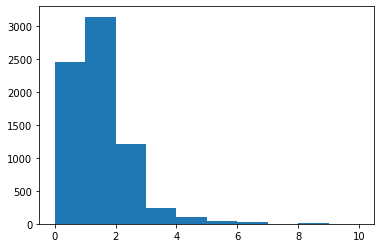

In [ ]:
plt.hist(df2["parking spaces"], bins=10,)

In [ ]:
df2.groupby('parking spaces').count()

,city,area,rooms,bathroom,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
parking spaces,,,,,,,,,,,,
0,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444
1,3137,3137,3137,3137,3137,3137,3137,3137,3137,3137,3137,3137
2,1213,1213,1213,1213,1213,1213,1213,1213,1213,1213,1213,1213
3,240,240,240,240,240,240,240,240,240,240,240,240
4,103,103,103,103,103,103,103,103,103,103,103,103
5,38,38,38,38,38,38,38,38,38,38,38,38
6,22,22,22,22,22,22,22,22,22,22,22,22
7,3,3,3,3,3,3,3,3,3,3,3,3
8,15,15,15,15,15,15,15,15,15,15,15,15


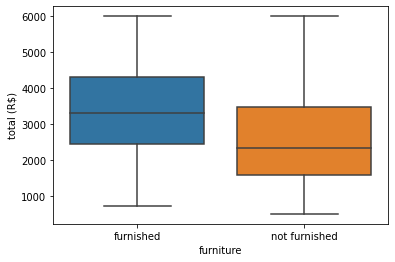

In [ ]:
sns.boxplot (x = 'furniture', y = 'total (R$)', data = df2)

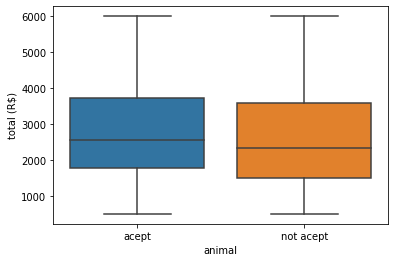

In [ ]:
sns.boxplot (x = 'animal', y = 'total (R$)', data = df2)

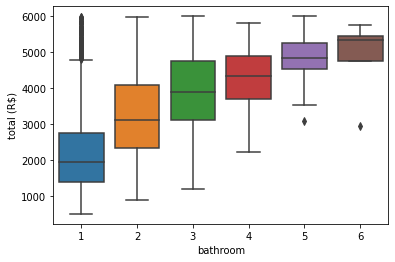

In [ ]:
sns.boxplot (x = 'bathroom', y = 'total (R$)', data = df2)

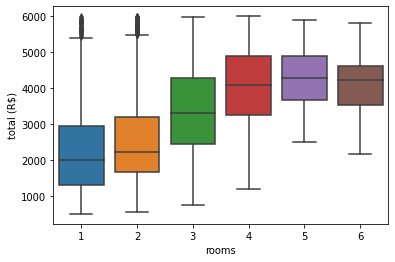

In [ ]:
sns.boxplot (x = 'rooms', y = 'total (R$)', data = df2)

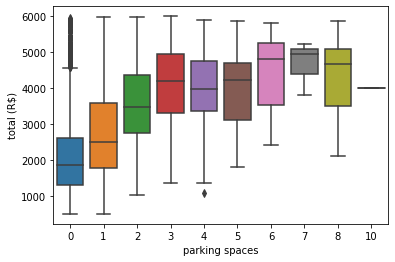

In [ ]:
sns.boxplot (x = 'parking spaces', y = 'total (R$)', data = df2)

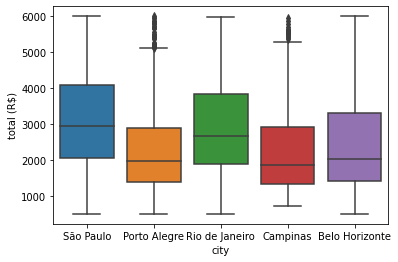

In [ ]:
#Outliers presentes en la ciudad de campinas y porto alegre
sns.boxplot (x = 'city', y = 'total (R$)', data = df2)

In [ ]:
df2.groupby('city').describe()

area                                                        \
                 count       mean        std   min   25%   50%    75%    max   
city                                                                           
Belo Horizonte   890.0  99.365169  60.966276  15.0  58.0  80.0  125.0  300.0   
Campinas         733.0  85.714870  51.702853  20.0  52.0  69.0  100.0  300.0   
Porto Alegre    1060.0  77.800000  48.227013  18.0  47.0  65.0   90.0  300.0   
Rio de Janeiro  1158.0  75.207254  41.954602  15.0  46.0  70.0   90.0  300.0   
São Paulo       3471.0  83.087583  55.245664  11.0  45.0  68.0  100.0  300.0   

                 rooms                                              bathroom  \
                 count      mean       std  min  25%  50%  75%  max    count   
city                                                                           
Belo Horizonte   890.0  2.558427  1.003628  1.0  2.0  3.0  3.0  6.0    890.0   
Campinas         733.0  2.143247  0.943745  1.0  1.0  2.0  3.0  6.0    733.0   
Porto Alegre    1060.0  1.960377  0.889736  1.0  1.0  2.0  3.0  6.0   1060.0   
Rio de Janeiro  1158.0  1.970639  0.851559  1.0  1.0  2.0  3.0  6.0   1158.0   
São Paulo       3471.0  2.007491  0.893751  1.0  1.0  2.0  3.0  6.0   3471.0   

                                                            parking spaces  \
                    mean       std  min  25%  50%  75%  max          count   
city                                                                         
Belo Horizonte  1.779775  0.863480  1.0  1.0  2.0  2.0  5.0          890.0   
Campinas        1.574352  0.835678  1.0  1.0  1.0  2.0  5.0          733.0   
Porto Alegre    1.504717  0.729117  1.0  1.0  1.0  2.0  6.0         1060.0   
Rio de Janeiro  1.467185  0.646948  1.0  1.0  1.0  2.0  4.0         1158.0   
São Paulo       1.642466  0.881658  1.0  1.0  1.0  2.0  6.0         3471.0   

                                                               floor  \
                    mean       std  min  25%  50%  75%   max   count   
city                                                                   
Belo Horizonte  1.341573  1.025086  0.0  1.0  1.0  2.0   8.0   890.0   
Campinas        1.234652  1.146174  0.0  1.0  1.0  2.0   8.0   733.0   
Porto Alegre    0.827358  0.878559  0.0  0.0  1.0  1.0   7.0  1060.0   
Rio de Janeiro  0.534542  0.694539  0.0  0.0  0.0  1.0   8.0  1158.0   
São Paulo       1.093345  1.112123  0.0  0.0  1.0  2.0  10.0  3471.0   

                                                             hoa (R$)  \
                    mean       std  min  25%  50%  75%   max    count   
city                                                                    
Belo Horizonte  3.328090  3.394265  0.0  1.0  2.0  4.0  20.0    890.0   
Campinas        4.414734  4.592986  0.0  1.0  3.0  7.0  51.0    733.0   
Porto Alegre    4.070755  3.878915  0.0  1.0  3.0  6.0  23.0   1060.0   
Rio de Janeiro  5.183074  4.033909  0.0  2.0  4.0  8.0  25.0   1158.0   
São Paulo       5.128205  5.710397  0.0  0.0  3.0  8.0  32.0   3471.0   

                                                                          \
                      mean         std  min    25%    50%    75%     max   
city                                                                       
Belo Horizonte  373.085393  360.886572  0.0  100.0  290.0  550.0  2000.0   
Campinas        506.851296  368.660259  0.0  290.0  470.0  700.0  1950.0   
Porto Alegre    408.663208  310.679259  0.0  240.0  350.0  500.0  2000.0   
Rio de Janeiro  718.002591  435.366098  0.0  450.0  660.0  966.0  2000.0   
São Paulo       527.785941  481.679963  0.0    0.0  480.0  800.0  2065.0   

               rent amount (R$)                                           \
                          count         mean          std    min     25%   
city                                                                       
Belo Horizonte            890.0  1915.296629  1050.258425  450.0  1100.0   
Campinas                  733.0  163

In [ ]:
ciudadP = df2[ (df2['city'] == 'Porto Alegre') & (df2['total (R$)'] > 4800) ].index
ciudadC = df2[ (df2['city'] == 'Campinas') & (df2['total (R$)'] > 4400) ].index
df2.drop(ciudadP , inplace=True)
df2.drop(ciudadC , inplace=True)

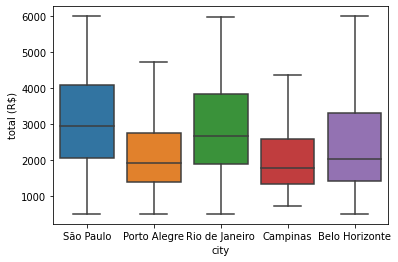

In [ ]:
#Variables sin outliers
sns.boxplot (x = 'city', y = 'total (R$)', data = df2)

In [ ]:
#Binarizacion de datos animal y furniture
animal_typesbin = pd.get_dummies(df2["animal"])
furniture_typesbin = pd.get_dummies(df2["furniture"])
city_typesbin = pd.get_dummies(df2["city"])

In [ ]:
#Concatenacion de filas binarizadas en df3
df3 = pd.concat ([df2,animal_typesbin],axis = 1)
df3 = pd.concat ([df3,furniture_typesbin],axis = 1)
df3 = pd.concat ([df3,city_typesbin],axis = 1)
#Eliminacion columnas animal y furniture
df3.drop(['animal', 'furniture','city'], axis = 1)

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),acept,not acept,furnished,not furnished,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
0,70,2,1,1,7,2065,3300,211,42,5618,1,0,1,0,0,0,0,0,1
2,80,1,1,1,6,1000,2800,0,41,3841,1,0,0,1,0,0,1,0,0
3,51,2,1,0,2,270,1112,22,17,1421,1,0,0,1,0,0,1,0,0
4,25,1,1,0,1,0,800,25,11,836,0,1,0,1,0,0,0,0,1
6,72,2,1,0,7,740,1900,85,25,2750,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,61,1,2,1,13,680,4000,140,51,4871,1,0,0,1,0,0,0,0,1
10682,160,3,2,3,4,850,3300,220,49,4419,1,0,1,0,0,0,1,0,0
10684,98,2,1,0,1,560,3900,184,51,4695,1,0,0,1,0,0,0,1,0
10687,63,2,1,1,5,402,1478,24,22,1926,0,1,1,0,0,0,1,0,0


In [ ]:
#Despues de la limpieza de los datos, quedamos con un 70% de los datos aproximadamente
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 7216 non-null   object
 1   area                 7216 non-null   int64 
 2   rooms                7216 non-null   int64 
 3   bathroom             7216 non-null   int64 
 4   parking spaces       7216 non-null   int64 
 5   floor                7216 non-null   int64 
 6   animal               7216 non-null   object
 7   furniture            7216 non-null   object
 8   hoa (R$)             7216 non-null   int64 
 9   rent amount (R$)     7216 non-null   int64 
 10  property tax (R$)    7216 non-null   int64 
 11  fire insurance (R$)  7216 non-null   int64 
 12  total (R$)           7216 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 789.2+ KB


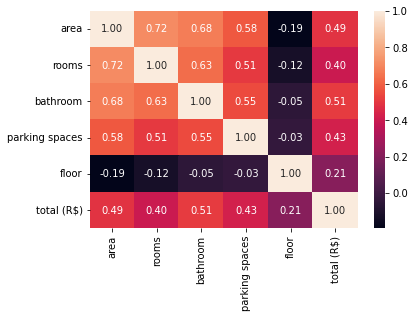

In [ ]:
cdf = df2 [["area",	"rooms",	"bathroom",	"parking spaces",	"floor", "animal","city","furniture","total (R$)"]]

sns.heatmap(cdf.corr(),annot=True, fmt="0.2f")


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


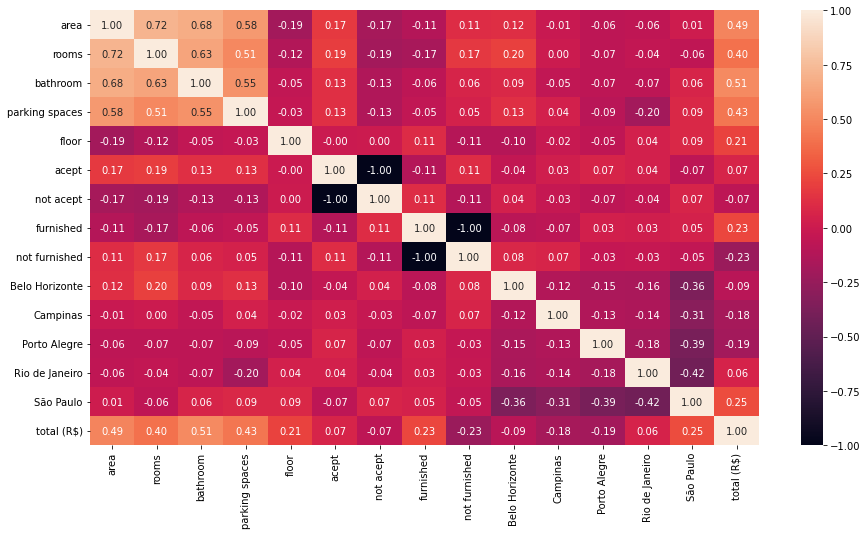

In [ ]:
cdf = df3 [["area","rooms","bathroom","parking spaces","floor","acept","not acept","furnished","not furnished","Belo Horizonte","Campinas","Porto Alegre","Rio de Janeiro","São Paulo","total (R$)"]]
plt.figure(figsize = (15,8))
sns.heatmap(cdf.corr(),annot=True, fmt="0.2f")
#cambio de nombre columna total
cdf.rename(columns = {'total (R$)':'TOTAL'}, inplace = True)


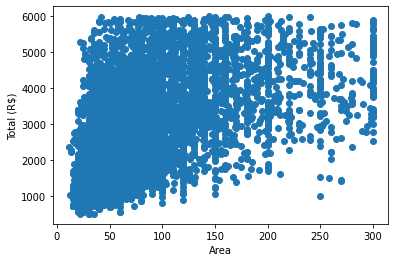

In [ ]:
plt.scatter(cdf.area,cdf.TOTAL)
plt.xlabel("Area")
plt.ylabel("Total (R$)")
plt.show()


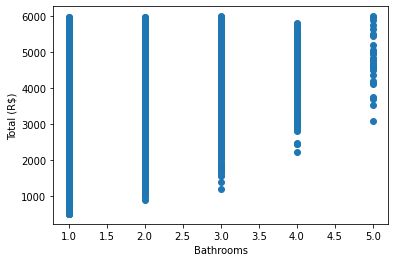

In [ ]:
plt.scatter(cdf.bathroom,cdf.TOTAL)
plt.xlabel("Bathrooms")
plt.ylabel("Total (R$)")
plt.show()


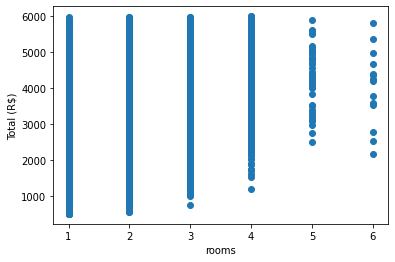

In [ ]:
plt.scatter(cdf.rooms,cdf.TOTAL)
plt.xlabel("rooms")
plt.ylabel("Total (R$)")
plt.show()


In [ ]:
msk=np.random.rand(len(cdf)) < 0.8
train=cdf[msk]
test=cdf[~msk]

In [ ]:
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[["area","bathroom","parking spaces"]])
train_y=np.asanyarray(train[["TOTAL"]])
regr.fit(train_x,train_y)
print("Coeficiente:",regr.coef_)
print("Intercepto:",regr.intercept_)

Coeficiente: [[  5.23530614 461.51823439 187.10803458]]
Intercepto: [1404.09372349]


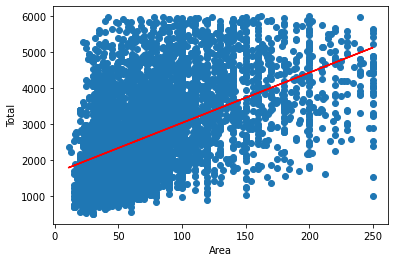

In [ ]:
plt.scatter(train.area,train.TOTAL)
#plt.plot(trainx[:,0],regr.coef[0][0]trainx[:,0]+regr.coef[0][1]trainx[:,1]+regr.intercept[0],'-r')
plt.plot(train_x[:,0],regr.coef_[0][0]*train_x[:,0]+regr.intercept_[0],'-r')

plt.xlabel("Area")
plt.ylabel("Total")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

#regr=linear_model.LinearRegression()
test_x=np.asanyarray(test[["area","bathroom","parking spaces"]])
test_y=regr.predict(test_x)
test_yR=np.asanyarray(test[["TOTAL"]])

print("R2-Score:", r2_score(test_y,test_yR))

R2-Score: -1.1171586405449325


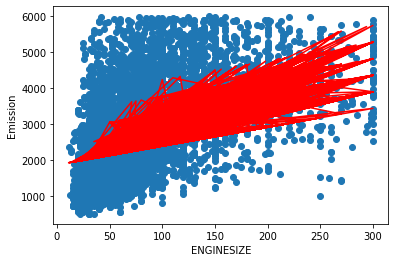

In [ ]:
plt.scatter(train.area,train.TOTAL)
#plt.plot(trainx[:,0],regr.coef[0][0]trainx[:,0]+regr.coef[0][1]trainx[:,1]+regr.intercept[0],'-r')
plt.plot(train["area"],regr.coef_[0][0]*train["area"]+regr.coef_[0][1]*train["bathroom"]+regr.intercept_[0],'-r')

plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()